### **This assignment uses the sklearn.datasets.load_wine() datasets that has 13 dimentionality. I apply the built-in KMeans and then my own KMeans to perform the clustering. Then PCA is performed to reduce the dimensionality to 2 and 3. And then the clusters along with their centers are plotted in 2D and 3D.**

### **WINE dataset Dimensionality = 13 and ideally Clusters = 3**

In [ ]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

wine = load_wine()
X = wine.data
Y = wine.target
print(X.shape)
print(wine.feature_names)
print(wine.target_names)

(178, 13)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


### **Target Array**

In [ ]:
print("The Actual Labels of the Dataset:")
print(Y)

The Actual Labels of the Dataset:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## **KMeans Built-in and My Own**

### **Built-in KMEANS**

In [ ]:
print("Time for built-in KMeans:")
%timeit kmeans = KMeans(n_clusters = 3, init = "random", n_init = "auto", max_iter = 300, random_state = 42).fit(X)
km = KMeans(n_clusters = 3, init = "random", n_init = "auto", max_iter = 300)
kmeans = km.fit(X)
labelK = kmeans.labels_

Time for built-in KMeans:
10.6 ms ± 419 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
print(kmeans.cluster_centers_)

[[1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]
 [1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]]


### **Accuracy of Built-in KMEANS**

In [ ]:
print("The labels as generated by built-in KMeans:")
print(labelK)
arr = labelK - Y
arr = arr[arr == 0]
print("\nThe Accuracy of the built-in KMeans:")
print(len(arr)/len(Y))

The labels as generated by built-in KMeans:
[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]

The Accuracy of the built-in KMeans:
0.702247191011236


### **My Own KMEANS**

In [ ]:
def kmeans(x, k, iter):
  n, d = x.shape
  centroids = x[np.random.choice(n, k, replace = False)]
  for i in range(iter):
    distances = np.linalg.norm(x[: ,np.newaxis, : ] - centroids, axis = -1)
    labels = np.argmin(distances, axis = 1)
    for j in range(k):
      centroids[j] = np.mean(x[labels == j], axis = 0)
  return centroids, labels

### **Accuracy of MY KMEANS**

In [ ]:
print("Time taken for my KMeans to run:")
%timeit centers, labels = kmeans(X, 3, 300)
centers, labels = kmeans(X, 3, 300)
print("\nThe Labels generated by my KMeans")
print(labels)
arr = labels - Y
arr = arr[arr == 0]
print("\nThe Accuracy of my KMeans:")
print(len(arr)/len(Y))

Time taken for my KMeans to run:
59.6 ms ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

The Labels generated by my KMeans
[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]

The Accuracy of my KMeans:
0.702247191011236


## **My Own PCA**

### **The Code**

In [ ]:
def My_PCA(X, k):
  means = np.mean(X, axis = 0)
  stds = np.std(X, axis = 0)
  # Scaling the X: same as StandardScaler()
  My_X_scaled = (X - means)/stds
  # Computing the Covariance Matrix of Scaled X
  cov = np.cov(My_X_scaled.T)
  # Finding EigenValues and EigenVectors of Covariance Matrix
  values, vectors = np.linalg.eig(cov)
  #Adjusting the signs of the EigenVectors
  max_abs_idx = np.argmax(np.abs(vectors), axis=0)
  signs = np.sign(vectors[max_abs_idx, range(vectors.shape[0])])
  vectors = vectors*signs[np.newaxis,:]
  vectors = vectors.T
  # Finding the Indices of the largest EigenValues
  indices = np.argsort(values)[::-1]
  eig = vectors[indices]
  # Taking only the Top k EigenVectors
  W = eig[:k]
  # Finally projection of Original Scaled data using the Top k EigenVectors
  X_proj = My_X_scaled @ W.T
  return X_proj

### **My PCA with 2 dimensions**

In [ ]:
X_2D = My_PCA(X, 2)
X_2D[:,1] = -X_2D[:,1]
print(X_2D.shape)
print()
print("Time for built-in KMeans:")
%timeit kmeans = KMeans(n_clusters = 3, init = "k-means++", n_init = "auto", max_iter = 300, random_state = 42).fit(X_2D)
km = KMeans(n_clusters = 3, init = "random", n_init = "auto", max_iter = 300)
kmeans = km.fit(X_2D)
labelK = kmeans.labels_

(178, 2)

Time for built-in KMeans:
2.19 ms ± 93.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### **Accuracy of KMeans on PCA-2**

In [ ]:
print("The labels as generated by built-in KMeans:")
print(labelK)
arr = labelK - Y
arr = arr[arr == 0]
print("\nThe Accuracy of the built-in KMeans:")
print(len(arr)/len(Y))

The labels as generated by built-in KMeans:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

The Accuracy of the built-in KMeans:
0.9662921348314607


### **The 3 centers in 2-Dimensions**

In [ ]:
print("The 3 centers in 2-dimensional space are:")
center = kmeans.cluster_centers_
print(center)

The 3 centers in 2-dimensional space are:
[[ 2.26614991 -0.86559213]
 [-0.16278513  1.76758824]
 [-2.74392982 -1.2141906 ]]


In [ ]:
model = PCA(n_components = 2)
scal = StandardScaler()
X_new = scal.fit_transform(X)
model.fit(X_new)
their2D = model.transform(X_new)
print(their2D[:10])
print()
print(X_2D[:10])

[[ 3.31675081 -1.44346263]
 [ 2.20946492  0.33339289]
 [ 2.51674015 -1.0311513 ]
 [ 3.75706561 -2.75637191]
 [ 1.00890849 -0.86983082]
 [ 3.05025392 -2.12240111]
 [ 2.44908967 -1.17485013]
 [ 2.05943687 -1.60896307]
 [ 2.5108743  -0.91807096]
 [ 2.75362819 -0.78943767]]

[[ 3.31675081 -1.44346263]
 [ 2.20946492  0.33339289]
 [ 2.51674015 -1.0311513 ]
 [ 3.75706561 -2.75637191]
 [ 1.00890849 -0.86983082]
 [ 3.05025392 -2.12240111]
 [ 2.44908967 -1.17485013]
 [ 2.05943687 -1.60896307]
 [ 2.5108743  -0.91807096]
 [ 2.75362819 -0.78943767]]


### **Comparison between Built-in and My PCA**

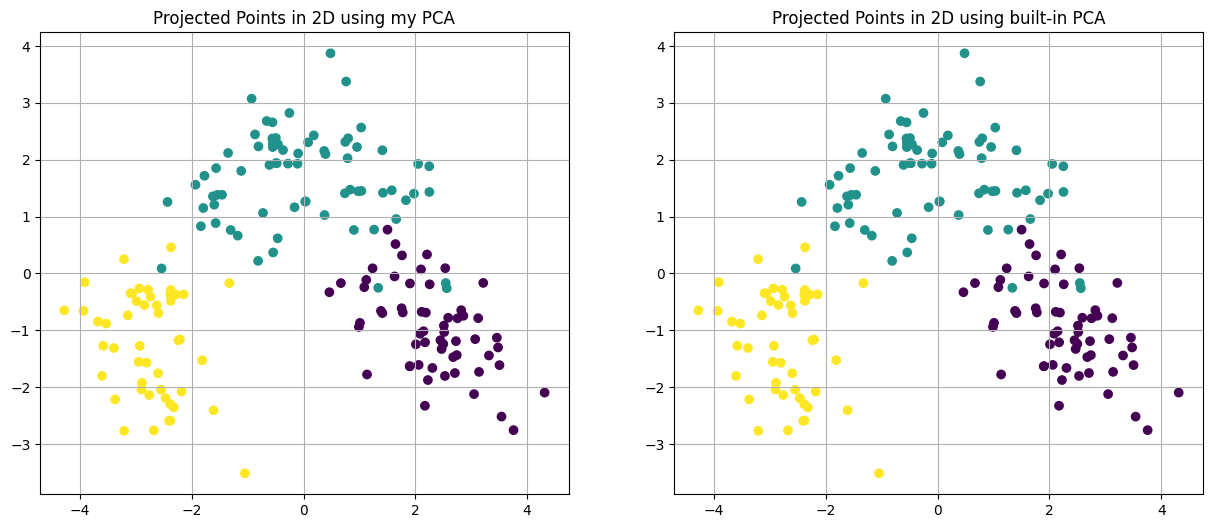

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_2D[:, 0], X_2D[:, 1], c = Y)
plt.title("Projected Points in 2D using my PCA")
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(their2D[:, 0], their2D[:, 1], c = Y)
plt.title("Projected Points in 2D using built-in PCA")
plt.grid()
plt.show()

### **Visualizing Clustering in 2D**

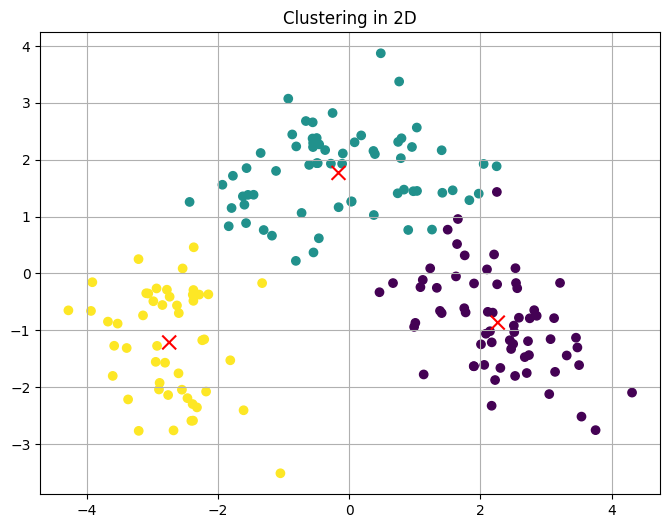

In [ ]:
plt.figure(figsize = (8, 6))
plt.scatter(X_2D[:, 0], X_2D[:, 1], c = labelK)
plt.scatter(center[:, 0], center[:, 1], marker = "x", s = [100]*3, color = "red")
plt.title("Clustering in 2D")
plt.grid()
plt.show()

### **My PCA with 3 dimensions**

In [ ]:
X_3D = My_PCA(X, 3)
X_3D[:,1] = -X_3D[:,1]
print(X_3D.shape)
print()
print("Time for built-in KMeans:")
%timeit kmeans = KMeans(n_clusters = 3, init = "k-means++", n_init = "auto", max_iter = 300, random_state = 42).fit(X_3D)
km = KMeans(n_clusters = 3, init = "random", n_init = "auto", max_iter = 300)
kmeans = km.fit(X_3D)
labelK = kmeans.labels_

(178, 3)

Time for built-in KMeans:
2.25 ms ± 76.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### **Accuracy of KMeans on PCA-3**

In [ ]:
print("The labels as generated by built-in KMeans:")
print(labelK)
arr = labelK - Y
arr = arr[arr == 0]
print("\nThe Accuracy of the built-in KMeans:")
print(len(arr)/len(Y))

The labels as generated by built-in KMeans:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

The Accuracy of the built-in KMeans:
0.9662921348314607


### **The 3 centers in 3-Dimensions**

In [ ]:
print("The 3 centers in 2-dimensional space are:")
center = kmeans.cluster_centers_
print(center)

The 3 centers in 2-dimensional space are:
[[ 2.27619360e+00 -9.32054027e-01  1.52803156e-03]
 [-3.69566084e-02  1.77223945e+00  1.86138728e-01]
 [-2.72003575e+00 -1.12565126e+00 -2.39093241e-01]]


In [ ]:
model = PCA(n_components = 3)
scal = StandardScaler()
X_new = scal.fit_transform(X)
model.fit(X_new)
their3D = model.transform(X_new)
print(their3D[:10])
print()
print(X_3D[:10])

[[ 3.31675081 -1.44346263 -0.16573904]
 [ 2.20946492  0.33339289 -2.02645737]
 [ 2.51674015 -1.0311513   0.98281867]
 [ 3.75706561 -2.75637191 -0.17619184]
 [ 1.00890849 -0.86983082  2.02668822]
 [ 3.05025392 -2.12240111 -0.62939583]
 [ 2.44908967 -1.17485013 -0.97709489]
 [ 2.05943687 -1.60896307  0.14628188]
 [ 2.5108743  -0.91807096 -1.77096903]
 [ 2.75362819 -0.78943767 -0.98424749]]

[[ 3.31675081 -1.44346263 -0.16573904]
 [ 2.20946492  0.33339289 -2.02645737]
 [ 2.51674015 -1.0311513   0.98281867]
 [ 3.75706561 -2.75637191 -0.17619184]
 [ 1.00890849 -0.86983082  2.02668822]
 [ 3.05025392 -2.12240111 -0.62939583]
 [ 2.44908967 -1.17485013 -0.97709489]
 [ 2.05943687 -1.60896307  0.14628188]
 [ 2.5108743  -0.91807096 -1.77096903]
 [ 2.75362819 -0.78943767 -0.98424749]]


### **Comparison between Built-in and My PCA**

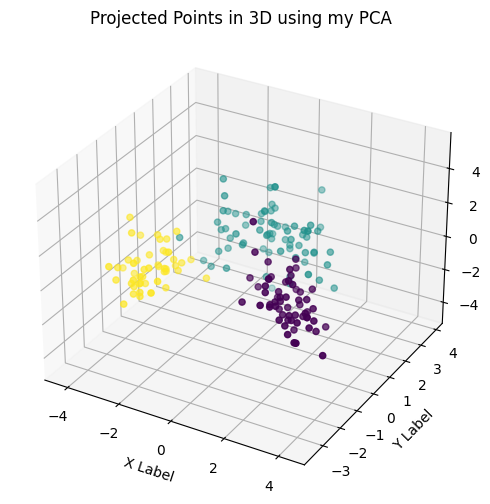

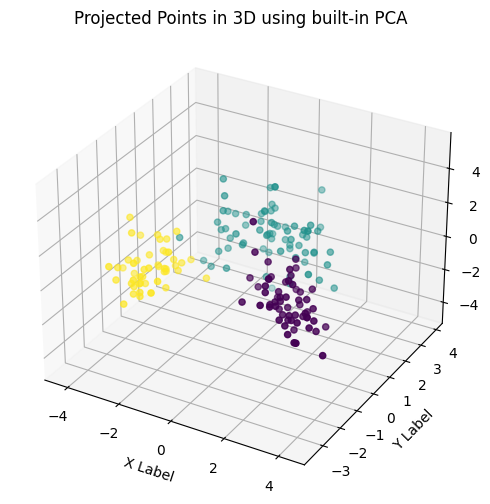

In [ ]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3D[:, 0], X_3D[:, 1], X_3D[:, 2], c = Y)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title("Projected Points in 3D using my PCA")
plt.grid()
plt.show()

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(their3D[:, 0], their3D[:, 1], their3D[:, 2], c = Y)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title("Projected Points in 3D using built-in PCA")
plt.grid()
plt.show()

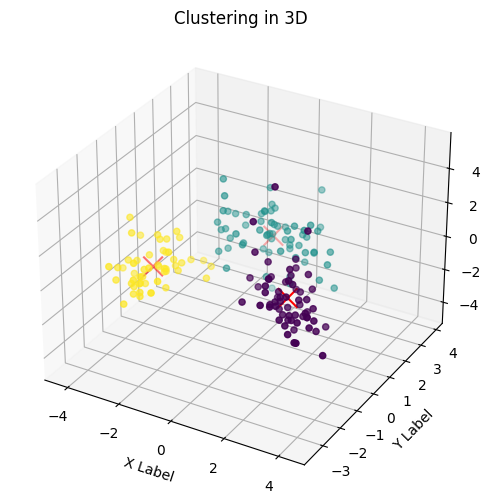

In [ ]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3D[:, 0], X_3D[:, 1], X_3D[:, 2], c = labelK)
ax.scatter(center[:, 0], center[:, 1], center[:, 2], s = [200]*3, marker = "x", color = "red")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title("Clustering in 3D")
plt.grid()
plt.show()